In [136]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

import itertools

import tensorflow as tf

from keras.layers import Dropout
from keras import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [137]:
folder = 'datasetNovoComAntigo'
#mudei essas linhas de baixo pois estava em 120
image_width = 64
image_height = 64
channels = 3

train_files = []
i=0
for coin in ['5', '10', '25', '50', '100']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels), dtype=np.float32)
y_dataset = []

i = 0
for coin in ['5', '10', '25', '50', '100']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(coin)) if os.path.isfile(os.path.join(folder + '/' + str(coin), f))]
    for _file in onlyfiles:
  ###
        img = cv2.imread(os.path.join(folder, coin, _file))
        img_resized = cv2.resize(img, (image_width, image_height))

        dataset[i] = img_resized
        mapping = {'5': 0, '10': 1, '25': 2, '50': 3, '100': 4, }
        y_dataset.append(mapping[coin])
   ###

        i += 1
        if i % 250 == 0:
            print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
All images to array!


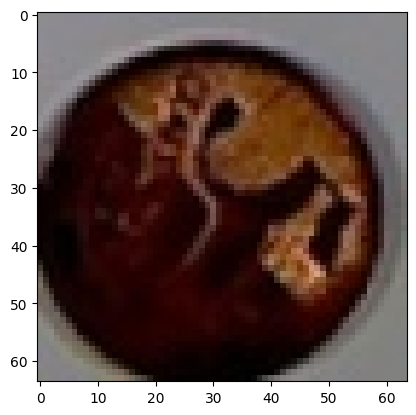

5


In [138]:
# normalizando os dados
dataset = dataset.astype('float32')
dataset /= 255

pixels = np.array(dataset[0], dtype='float32')
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()
n_classes = len(set(y_dataset))
print(n_classes)

y_dataset_ = to_categorical(y_dataset, n_classes)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset_, test_size=0.2)
print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 1440, Test set size: 360


In [141]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=90, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')

datagen.fit(X_train)


In [174]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size=(5, 5), activation='relu', strides=(2,2)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu', strides=(2,2)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=(2, 2), activation='relu', strides=(2,2)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 128, activation='relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(units = 5, activation='softmax', name = 'saida'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Ba  (None, 64, 64, 3)         12        
 tchNormalization)                                               
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 128)       9728      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 30, 30, 128)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 14, 14, 64)      

In [175]:
#taxa de aprendizado
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [176]:
#parada antecipada
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'max', patience = 10)

#treinando o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks = [early_stopping])


Epoch 1/100
36/36 [==============================] - 78s 2s/step - loss: 1.2821 - accuracy: 0.4392 - val_loss: 1.5216 - val_accuracy: 0.3785
Epoch 2/100
36/36 [==============================] - 70s 2s/step - loss: 0.8026 - accuracy: 0.6866 - val_loss: 1.2336 - val_accuracy: 0.7083
Epoch 3/100
36/36 [==============================] - 73s 2s/step - loss: 0.6053 - accuracy: 0.7526 - val_loss: 0.9609 - val_accuracy: 0.7465
Epoch 4/100
36/36 [==============================] - 99s 3s/step - loss: 0.5829 - accuracy: 0.7656 - val_loss: 0.8304 - val_accuracy: 0.7951
Epoch 5/100
36/36 [==============================] - 69s 2s/step - loss: 0.5271 - accuracy: 0.7812 - val_loss: 0.6745 - val_accuracy: 0.8090
Epoch 6/100
36/36 [==============================] - 81s 2s/step - loss: 0.4400 - accuracy: 0.8333 - val_loss: 0.6145 - val_accuracy: 0.8021
Epoch 7/100
36/36 [==============================] - 91s 3s/step - loss: 0.3891 - accuracy: 0.8429 - val_loss: 0.4943 - val_accuracy: 0.8333
Epoch 8/100
3

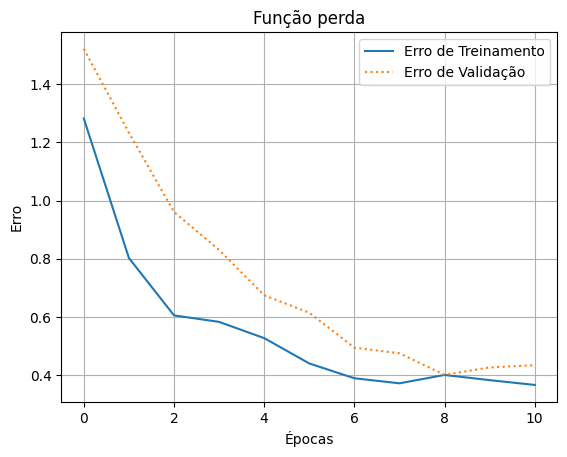

In [177]:
# Gráfico de treinamento e validação da função perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], ':')
plt.title('Função perda')
#plt.yscale('log')
plt.ylabel('Erro')
plt.xlabel('Épocas')
plt.legend(['Erro de Treinamento', 'Erro de Validação'])
plt.grid(True)
plt.show()

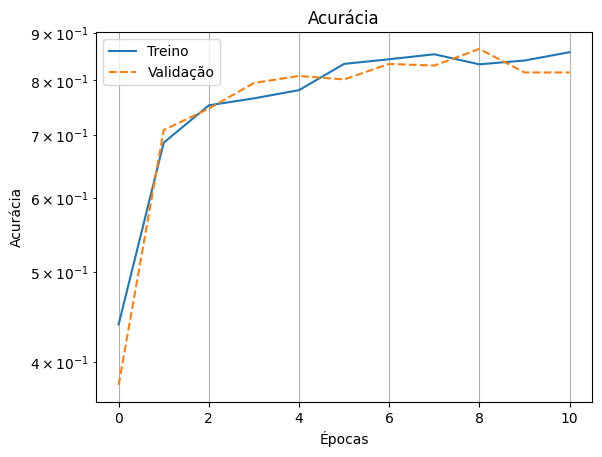

In [178]:
# Plotando o treinamento e a validação da accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '--')
plt.yscale("log")
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'])
plt.grid(True)
plt.show()

In [179]:
preds = model.predict(X_test)

12/12 [==============================] - 18s 2s/step


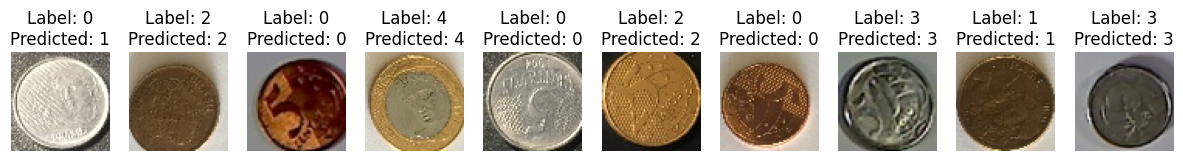

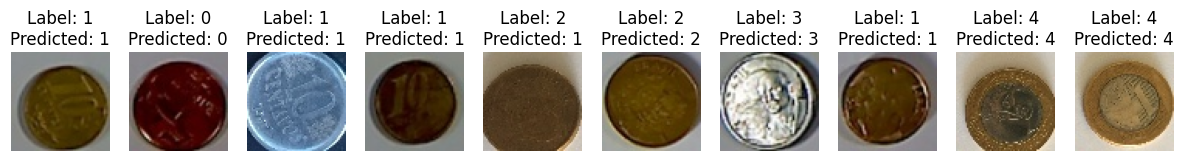

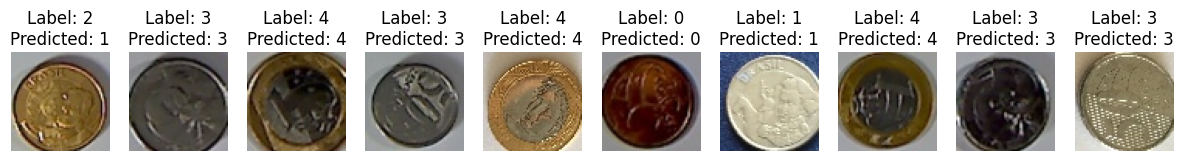

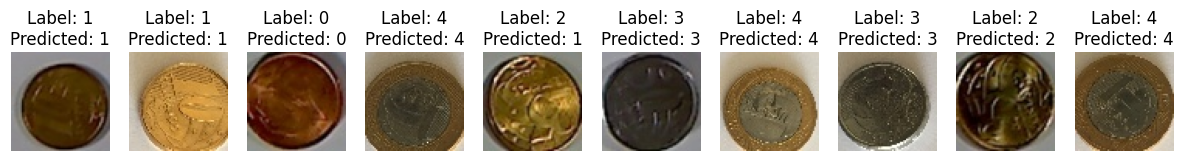

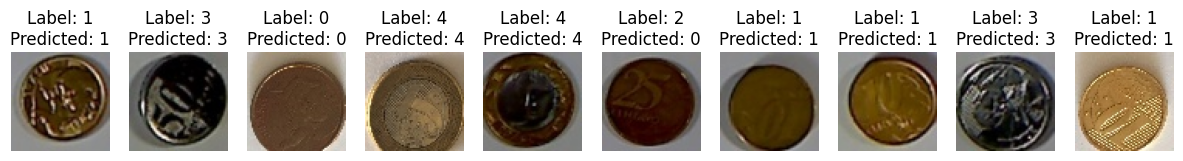

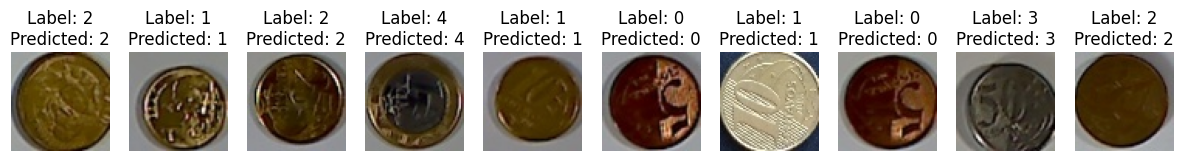

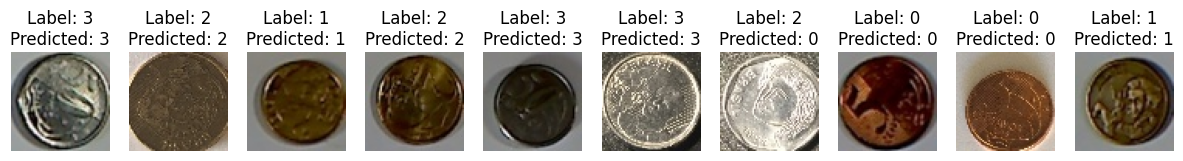

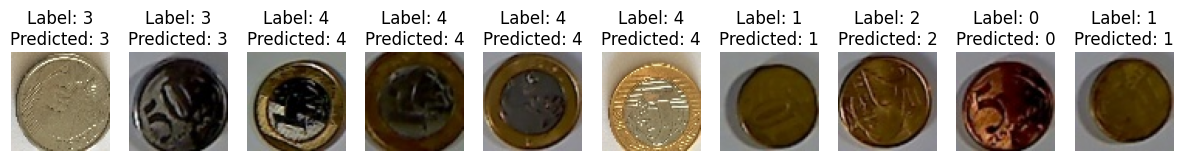

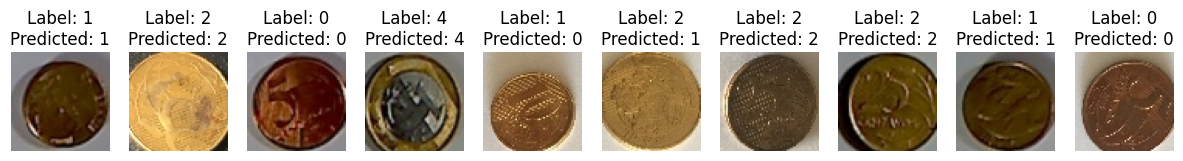

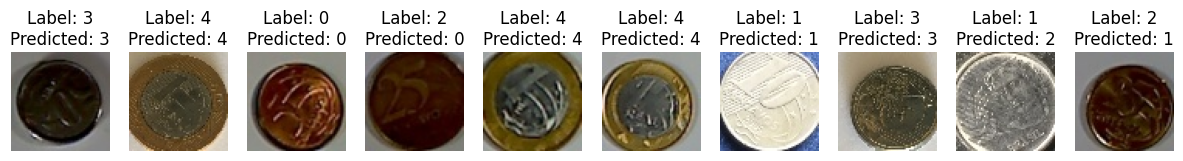

In [180]:
n = 10
for t in range(10):
    plt.figure(figsize=(15,15))
    for i in range(n*t, n*(t+1)):
        plt.subplot(1, n, i + 1 - n*t)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Label: {}\nPredicted: {}'.format(np.argmax(y_test[i]), np.argmax(preds[i])))
        plt.axis('off')
    plt.show()

In [181]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

Confusion matrix, without normalization
[[65  2  0  0  0]
 [ 2 68  3  2  0]
 [ 6 33 32  3  0]
 [ 0  0  0 72  2]
 [ 0  0  0  0 70]]


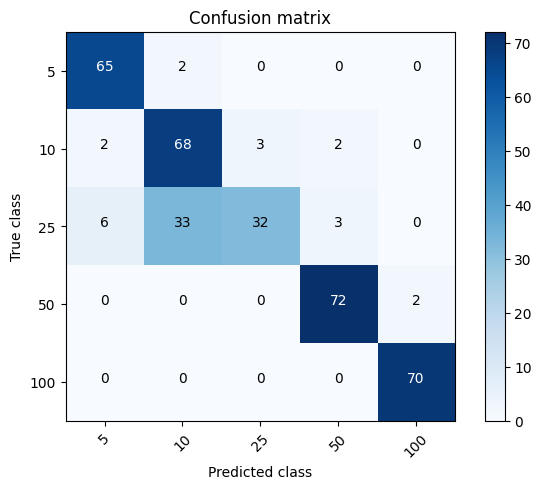

In [182]:
# Plot non-normalized confusion matrix
#y_test_ = np.apply_along_axis(np.argmax, 1, y_test)
#preds_ = np.apply_along_axis(np.argmax, 1, preds)
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

cm = confusion_matrix(y_test_, preds_)
plt.figure()
plot_confusion_matrix(cm, classes=['5', '10', '25', '50', '100'], title='Confusion matrix')
plt.show()

In [183]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: {:.2f}%".format(accuracy * 100))

12/12 [==============================] - 9s 541ms/step - loss: 0.4029 - accuracy: 0.8528
Loss:  0.4029374420642853
Accuracy: 85.28%


In [184]:
# Convertendo as previsões e os rótulos de volta para as classes originais
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]


In [185]:
# Calcular acurácia
accuracy = accuracy_score(y_test_, preds_)
print("Acurácia:", accuracy)

Acurácia: 0.8527777777777777


In [155]:
# Calcular precisão
precision = precision_score(y_test_, preds_, average='macro')
print("Precisão:", precision)

Precisão: 0.8332342360835512


In [156]:
# Calcular recall
recall = recall_score(y_test_, preds_, average='macro')
print("Recall:", recall)

Recall: 0.8378195508941777


In [157]:
# Calcular F1 score
f1 = f1_score(y_test_, preds_, average='macro')
print("F1-score:", f1)

F1-score: 0.834375300322517


In [158]:
# Testando o modelo
teste_image_path = 'moeda.jpg'  # Substitua pelo caminho da sua imagem de teste
teste_image = tf.keras.preprocessing.image.load_img(teste_image_path, target_size=(64, 64))
teste_image_array = tf.keras.preprocessing.image.img_to_array(teste_image)
teste_image_array = np.expand_dims(teste_image_array, axis=0)  # Adiciona uma dimensão para representar o lote (batch)

# Predição
saida_predita = model.predict(teste_image_array)

print('Saída Preditada:', saida_predita)


1/1 [==============================] - 0s 67ms/step
Saída Preditada: [[0.000000e+00 8.527183e-12 1.000000e+00 0.000000e+00 0.000000e+00]]


In [159]:
# Mapeamento de números de classe para nomes de classe
class_name = {
    0: "Moeda de 5 centavos",
    1: "Moeda de 10 centavos",
    2: "Moeda de 25 centavos",
    3: "Moeda de 50 centavos",
    4: "Moeda de 1 real"
}

# Obtém o número da classe prevista
classe_prevista = np.argmax(saida_predita)

# Obtém o nome da classe prevista usando o mapeamento
nome_classe_prevista = class_name[classe_prevista]

print('Classe Prevista:', nome_classe_prevista)

Classe Prevista: Moeda de 25 centavos


In [ ]:
# saving model
#model.save('mode_acurracy87.h5')

In [ ]:
#dados = pd.DataFrame(history.history)
#dados.head()

In [ ]:
#dados.to_csv('loss.csv')